# Natural Disasters Dashboard

## The Dataset

### Aggregated figures for Natural Disasters in EM-DAT

Link: https://data.humdata.org/dataset/emdat-country-profiles


In 1988, the **Centre for Research on the Epidemiology of Disasters (CRED)** launched the **Emergency Events Database (EM-DAT)**. EM-DAT was created with the initial support of the **World Health Organisation (WHO) and the Belgian Government**.

The main objective of the database is to **serve the purposes of humanitarian action at national and international levels**. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.

EM-DAT contains essential core data on the **occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day**. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.



## Recherchefragen

- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Wie viele Todesopfer gibt es insgesamt?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

In [1]:
# Install all necessary packages
!pip3 install --upgrade pip
!pip3 install --upgrade Pillow
!pip3 install matplotlib
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../data/clean_emdat.csv', index_col=0)

In [3]:
def create_title(country):
    '''takes a country string and return the title'''
    return f'\n\n Naturkatastrophen in {country} \n\n'.upper()

In [4]:
def plot_pie(country_data):
    '''creates a pie chart with the total deaths per disaster type'''
    deaths_per_disaster = country_data.groupby('Disaster Type')['Total Deaths'].sum()
    deaths_per_disaster.plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [5]:
def plot_time_evolution(country_data):
    '''plots the number of natural disasters over the years'''
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [6]:
def death_overview(country_data):
    '''prints the total number of death people '''
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [7]:
def compute_anteil(country_total, world_total):
    '''computes the percentage of people affected compared to the world'''
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.\n')

In [8]:
def analyze(data, country='world'):
    '''brings all functions together to create a country report'''
    print(create_title(country))
    
    # extract the data belonging to a country
    country_data = data[data['Country'] == country]  
    # if 'world' is the argument the full dataset is evaluated
    if country == 'world':
        country_data = data
    
    # compute the number of people affected
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    
    # plot the graphs
    plot_pie(country_data)
    plot_time_evolution(country_data)



 NATURKATASTROPHEN IN GERMANY 


0.01% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.

Getötete Menschen seit 1900: 10,419


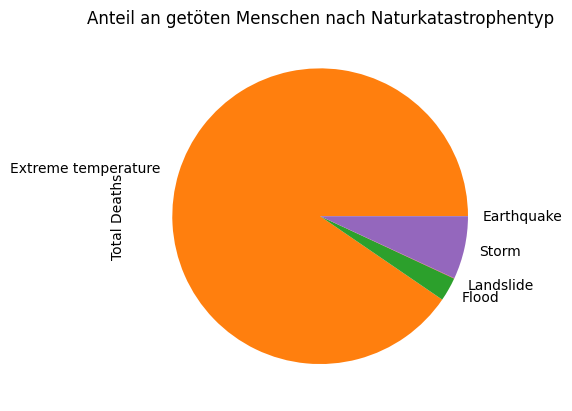

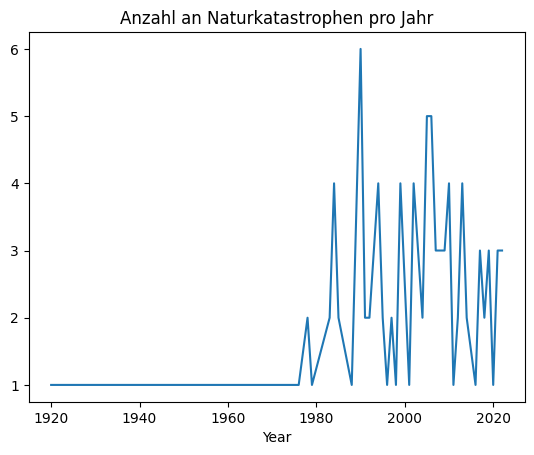

In [25]:
analyze(data, 'Germany')